# Neuron Models

## Prelims

In [71]:
import numpy as np
import matplotlib.pyplot as plt

import neuron_models as nm
import ans as ans

# These next two lines automatically reload the imports if they are changed.
%load_ext autoreload
%autoreload 2

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [ ]:
# Create and connect LIF neurons
LIF_A = ans.LIFNeuron(Tau_m=0.02, Tau_ref=0.01, Tau_s=0.06, label='A')
LIF_B = ans.LIFNeuron(Tau_m=0.02, Tau_ref=0.01, Tau_s=0.06, label='B')
LIF_A.connect_to(LIF_B, 0.07)
LIF_B.connect_to(LIF_A, 0.07)

# Create and connect input neurons
InA = nm.InputNeuron(nm.generate_spike_train([[0, 0], [1.2, 50], [1.3, 0]]), label='InA')
InB = nm.InputNeuron(nm.generate_spike_train([[0, 40], [0.1, 0]]), label='InB')
InA.connect_to(LIF_A, -0.6)
InB.connect_to(LIF_B, 0.3)

# Create the network and add neurons
net3 = nm.SpikingNetwork()
net3.add_neuron(InA)
net3.add_neuron(InB)
net3.add_neuron(LIF_A)
net3.add_neuron(LIF_B)

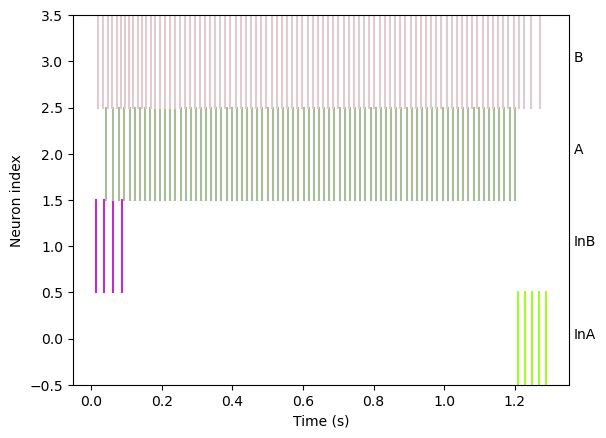

In [ ]:
net3.simulate(2, 0.001)
net3.spike_raster()

In [ ]:
N = 75
net4 = nm.SpikingNetwork()
inN = nm.InputNeuron(nm.generate_spike_train([[0, 20], [2, 0]]))
net4.add_neuron(inN)

# Creating and connecting the LIF neurons
neurons = [ans.LIFNeuron(Tau_m=0.01, Tau_ref=0.005, Tau_s=0.3, label=f'Neuron #{i}') for i in range(N)]
for i in range(N):
    inN.connect_to(neurons[i], float((3 * i)/(20 * N)))
    net4.add_neuron(neurons[i])

In [ ]:
net4.simulate(2, 0.001)
spikes_rate = []
currents = []

for neuron in neurons:
    neuron_spiketrain = neuron.get_spikes()
    spike_count = nm.spikes_between(neuron_spiketrain, 1, 2)
    spikes_rate.append(spike_count)
    currents.append(np.mean(neuron.get_s_history()[1000:]))

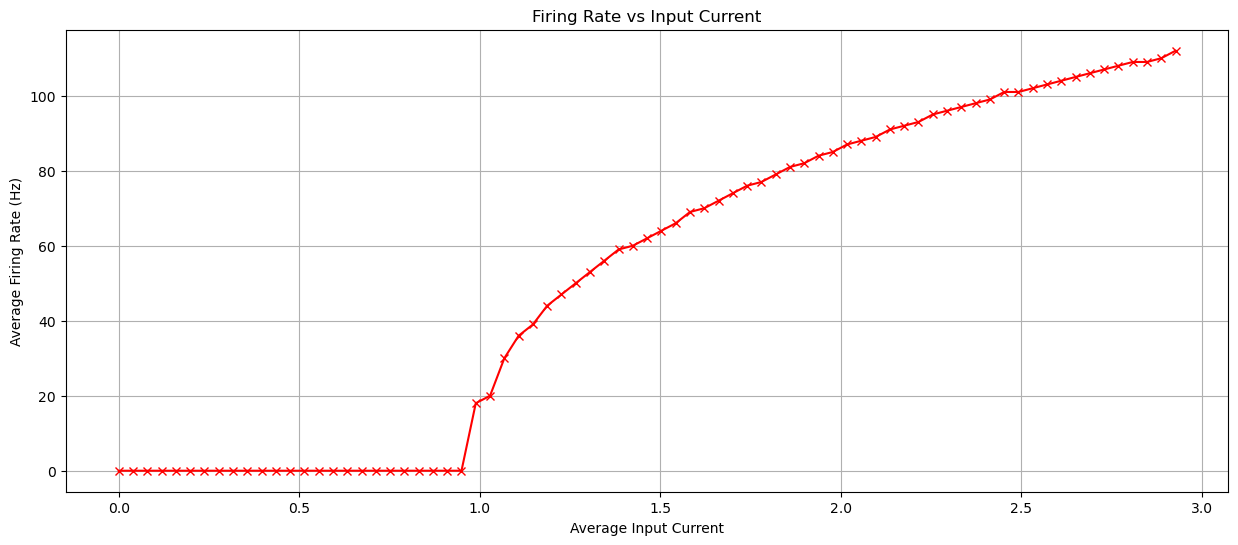

In [ ]:
plt.figure(figsize=(15,6))
plt.plot(currents, spikes_rate, marker = 'x', color='red')
plt.xlabel('Average Input Current')
plt.ylabel('Average Firing Rate (Hz)')
plt.title('Firing Rate vs Input Current')
plt.grid(True)
plt.show()